In [1]:
!git clone https://github.com/MagicShow1999/CV-Final-Project


Cloning into 'CV-Final-Project'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 99 (delta 13), reused 45 (delta 6), pack-reused 44
Unpacking objects: 100% (99/99), done.


In [2]:
%cd /content/CV-Final-Project/

/content/CV-Final-Project


In [3]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

import util, model, constant

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

imsize = 1024 if device == "cuda" else 128

uniform_h = 200
uniform_w = 200
iterations = 1000

output_path = "./image/vgg16_out_2.jpg"
style_path = "./image/style_img_v2.jpg"
content_path = "./image/content_img_2.jpg"

# make sure two images are of the same size. 
# style_image = util.read_image(style_path, imsize, imsize).to(device)
# content_image = util.read_image(content_path, imsize, imsize).to(device)
style_image = util.read_image(style_path).to(device)
content_image = util.read_image(content_path, 720, 1280).to(device)

print("Style image shape: ", style_image.shape)
print("Content image shape: ", content_image.shape)

# assert style_image.size() == content_image.size()

Style image shape:  torch.Size([1, 3, 606, 859])
Content image shape:  torch.Size([1, 3, 720, 1280])


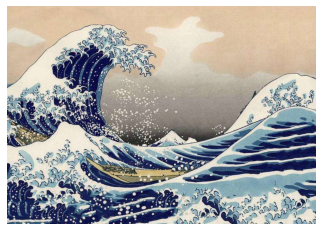

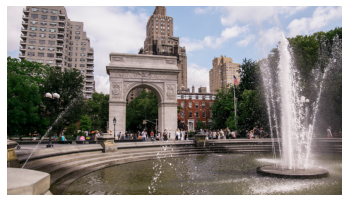

In [5]:
util.paint_image(style_image, title="style")
util.paint_image(content_image, title="content")

In [6]:
# build feature model
vgg16 = models.vgg16(pretrained=True)
vgg16 = model.VGG(vgg16.features[:23]).to(device).eval()

print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
style_features = vgg16(style_image)
content_features = vgg16(content_image)

print("style features: ")
print([x.shape for x in style_features])

print("content features: ")
print([x.shape for x in content_features])

style features: 
[torch.Size([1, 64, 606, 859]), torch.Size([1, 128, 303, 429]), torch.Size([1, 256, 151, 214]), torch.Size([1, 512, 75, 107])]
content features: 
[torch.Size([1, 64, 720, 1280]), torch.Size([1, 128, 360, 640]), torch.Size([1, 256, 180, 320]), torch.Size([1, 512, 90, 160])]


In [8]:
style_gram = [util.gram_matrix(x) for x in style_features]

print("style gram matrix: ")
print([x.shape for x in style_gram])

style gram matrix: 
[torch.Size([1, 64, 64]), torch.Size([1, 128, 128]), torch.Size([1, 256, 256]), torch.Size([1, 512, 512])]


In [9]:
# setup for training
# output_image = torch.randn(content_image.size()).to(device)
# output_image.requires_grad_(True)
# style_weight = 1e5
output_image = content_image.clone().requires_grad_(True)
style_weight = 1e5

optimizer = optim.LBFGS([output_image])

Step 0: style_loss: 0.00041 content_loss: 0.00000


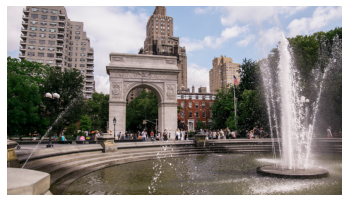

Step 20: style_loss: 0.00001 content_loss: 3.86526
Step 40: style_loss: 0.00001 content_loss: 3.35069
Step 60: style_loss: 0.00001 content_loss: 3.19272
Step 80: style_loss: 0.00001 content_loss: 3.10388
Step 100: style_loss: 0.00001 content_loss: 3.04958


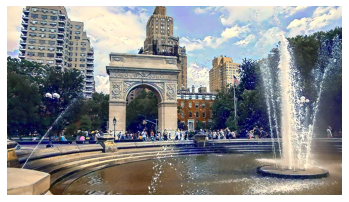

Step 120: style_loss: 0.00001 content_loss: 3.01642
Step 140: style_loss: 0.00001 content_loss: 2.99310
Step 160: style_loss: 0.00001 content_loss: 2.97317
Step 180: style_loss: 0.00001 content_loss: 2.95688
Step 200: style_loss: 0.00001 content_loss: 2.94384


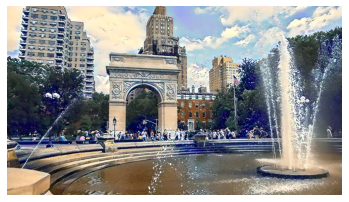

Step 220: style_loss: 0.00001 content_loss: 2.93280
Step 240: style_loss: 0.00001 content_loss: 2.92330
Step 260: style_loss: 0.00001 content_loss: 2.91542
Step 280: style_loss: 0.00001 content_loss: 2.90869
Step 300: style_loss: 0.00001 content_loss: 2.90236


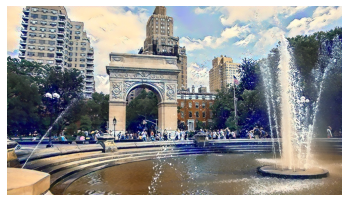

Step 320: style_loss: 0.00001 content_loss: 2.89683
Step 340: style_loss: 0.00001 content_loss: 2.89199
Step 360: style_loss: 0.00001 content_loss: 2.88746
Step 380: style_loss: 0.00001 content_loss: 2.88362
Step 400: style_loss: 0.00001 content_loss: 2.88002


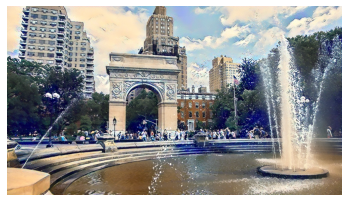

Step 420: style_loss: 0.00001 content_loss: 2.87639
Step 440: style_loss: 0.00001 content_loss: 2.87332
Step 460: style_loss: 0.00001 content_loss: 2.87036
Step 480: style_loss: 0.00001 content_loss: 2.86777
Step 500: style_loss: 0.00001 content_loss: 2.86534


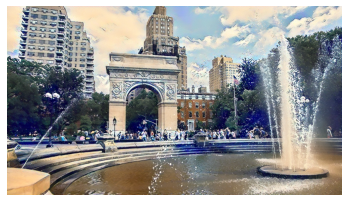

Step 520: style_loss: 0.00001 content_loss: 2.86294
Step 540: style_loss: 0.00001 content_loss: 2.86092
Step 560: style_loss: 0.00001 content_loss: 2.85904
Step 580: style_loss: 0.00001 content_loss: 2.85712
Step 600: style_loss: 0.00001 content_loss: 2.85550


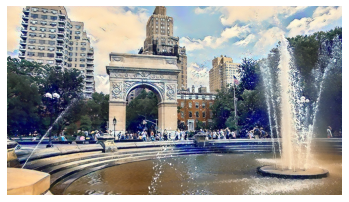

Step 620: style_loss: 0.00001 content_loss: 2.85389
Step 640: style_loss: 0.00001 content_loss: 2.85227
Step 660: style_loss: 0.00001 content_loss: 2.85102
Step 680: style_loss: 0.00001 content_loss: 2.84955
Step 700: style_loss: 0.00001 content_loss: 2.84831


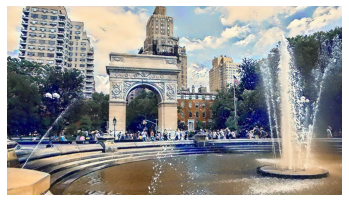

Step 720: style_loss: 0.00001 content_loss: 2.84696
Step 740: style_loss: 0.00001 content_loss: 2.84578
Step 760: style_loss: 0.00001 content_loss: 2.84468
Step 780: style_loss: 0.00001 content_loss: 2.84364
Step 800: style_loss: 0.00001 content_loss: 2.84277


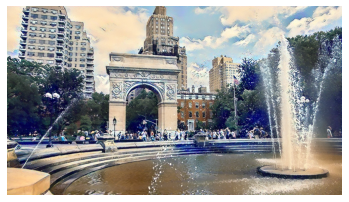

Step 820: style_loss: 0.00001 content_loss: 2.84178
Step 840: style_loss: 0.00001 content_loss: 2.84080
Step 860: style_loss: 0.00001 content_loss: 2.83997
Step 880: style_loss: 0.00001 content_loss: 2.83916
Step 900: style_loss: 0.00001 content_loss: 2.83838


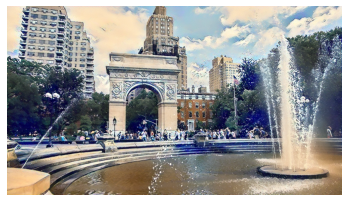

Step 920: style_loss: 0.00001 content_loss: 2.83760
Step 940: style_loss: 0.00001 content_loss: 2.83687
Step 960: style_loss: 0.00001 content_loss: 2.83624
Step 980: style_loss: 0.00001 content_loss: 2.83561
Step 1000: style_loss: 0.00001 content_loss: 2.83490


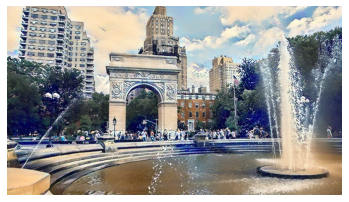

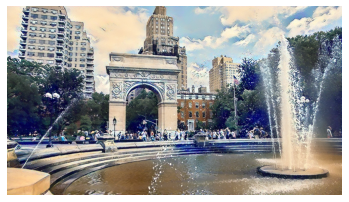

Successfully save the final stylized image to: ./image/vgg16_out_2.jpg


In [10]:
content_weight = 0.5

run = [0]

while run[0] <= iterations:
  def closure():
    optimizer.zero_grad()
    output_features = vgg16(output_image)
    content_loss = F.mse_loss(input=output_features[2], target=content_features[2])
    style_loss = 0
    output_gram = [util.gram_matrix(x) for x in output_features]
    for og, sg in zip(output_gram, style_gram):
        style_loss += F.mse_loss(input=og, target=sg)
    # factors of the tradeoff between style_loss and content_loss is hyperparameters
    loss = style_loss * style_weight + content_loss * content_weight

    if run[0] % 20 == 0:
        print("Step %d: style_loss: %.5f content_loss: %.5f" % (run[0], style_loss, content_loss))
    if run[0] % 100 == 0:
        util.paint_image(output_image, title='output image')

    # calculate gradient through backward
    loss.backward()
    run[0] += 1

    return loss

    # LBFGS optimizer to update parameters needs a closure that reevaluates the model and returns the loss
  optimizer.step(closure)

util.paint_image(output_image, title="output image")
util.save_image(output_image, output_path)

Step 0: style_loss: 0.00001 content_loss: 2.83428


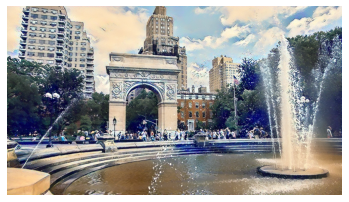

KeyboardInterrupt: ignored

In [11]:
#experiment with different optimizers.
lr = 0.003
optimizer = torch.optim.Adam([output_image],lr=lr)
# x is x-coordinate which denotes epochs
# y is x-coordinate which denotes total loss

for i in range(iterations):
    
    output_features = vgg16(output_image)
    content_loss = F.mse_loss(input=output_features[2], target=content_features[2])

    style_loss = 0
    output_gram = [util.gram_matrix(x) for x in output_features]
    for og, sg in zip(output_gram, style_gram):
        style_loss += F.mse_loss(input=og, target=sg)
    # factors of the tradeoff between style_loss and content_loss is hyperparameters
    loss = style_loss * style_weight + content_loss * content_weight

    if i % 20 == 0:
        print("Step %d: style_loss: %.5f content_loss: %.5f" % (i, style_loss, content_loss))
    if i % 100 == 0:
        util.paint_image(output_image, title='output image') 
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



In [12]:
!nvidia-smi

Thu Dec 16 19:24:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    41W / 250W |   6549MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

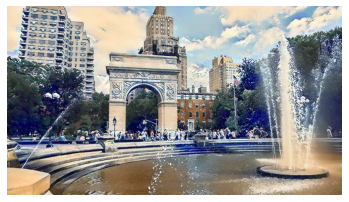

Successfully save the final stylized image to: ./image/vgg16_out_1_adam.jpg


In [13]:
util.paint_image(output_image.cpu(), title="output image")
util.save_image(output_image.cpu(), "./image/vgg16_out_1_adam.jpg")